<a href="https://colab.research.google.com/github/olevelychko/labs-Data-Analysis-2023/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
df = pd.read_csv('/content/sample_data/bmi_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [4]:
print("Missing values distribution: ")
print(df.isnull().mean())

Missing values distribution: 
Gender    0.0
Height    0.0
Weight    0.0
Index     0.0
dtype: float64


<ipython-input-5-ed44145e0867>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


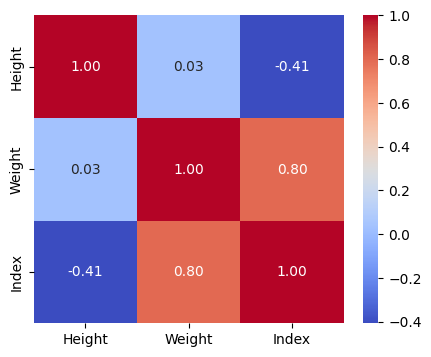

In [5]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

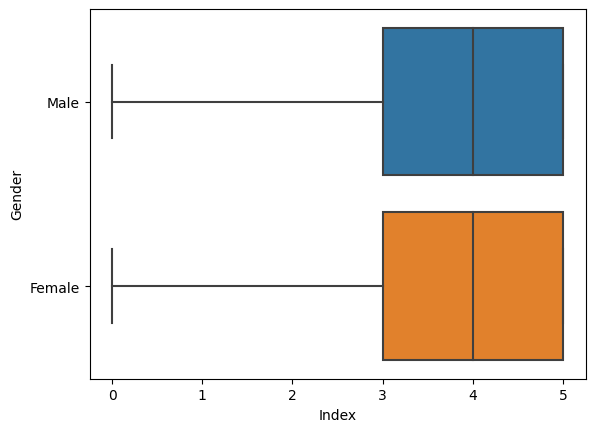

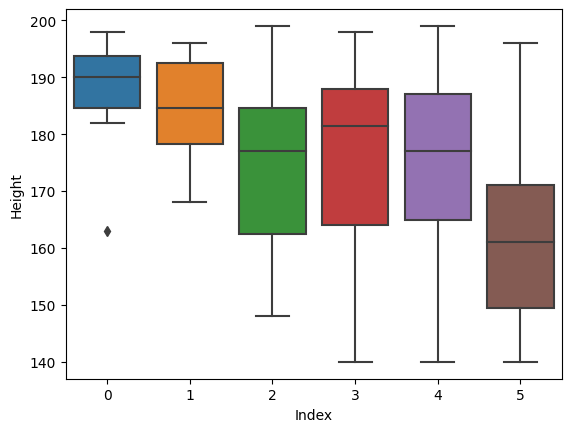

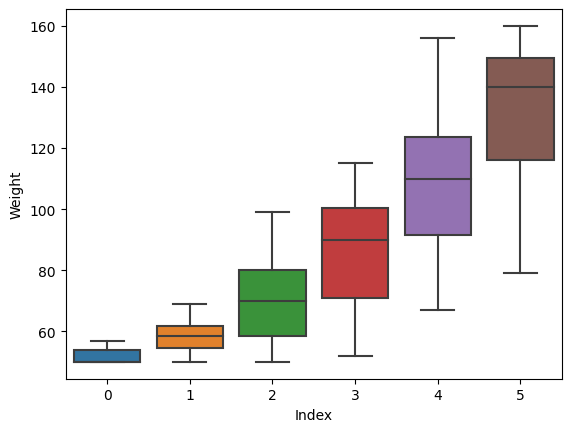

In [6]:
for i in range(len(df.columns)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='Index', y=list(df.columns)[i], data=df)

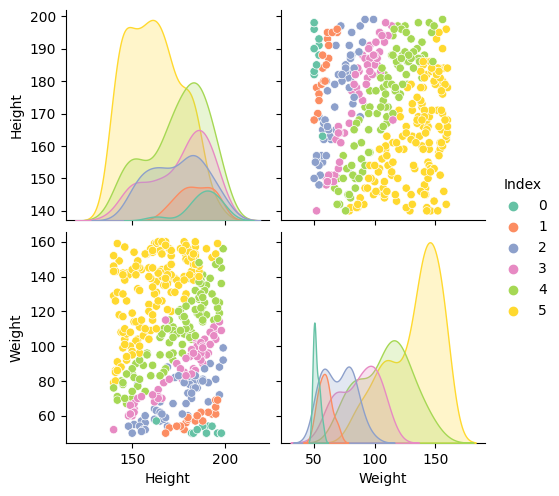

In [7]:
sns.pairplot(df, hue="Index", palette = 'Set2')

In [8]:
x = df.drop(['Index', 'Gender'], axis = 1)
y = df['Index']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [9]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_x_train, y_train)
predKNN = knn.predict(scaled_x_test)

In [11]:
print(confusion_matrix(y_test,predKNN))

[[ 2  2  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 14  0  1  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  2 17  2]
 [ 0  0  0  0  2 25]]


In [12]:
print(classification_report(y_test,predKNN))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.71      1.00      0.83         5
           2       1.00      0.93      0.97        15
           3       0.80      1.00      0.89         8
           4       0.85      0.81      0.83        21
           5       0.93      0.93      0.93        27

    accuracy                           0.89        80
   macro avg       0.88      0.86      0.85        80
weighted avg       0.90      0.89      0.89        80



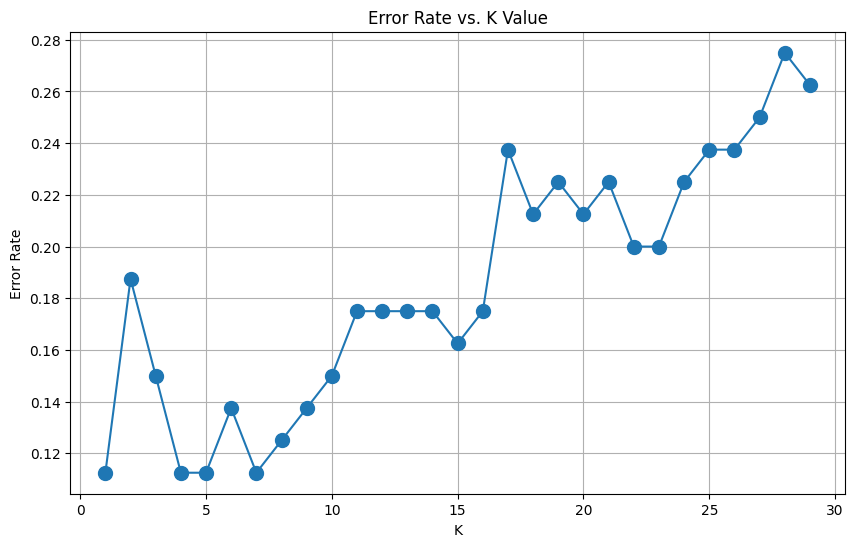

In [13]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_x_train,y_train)
    pred_i = knn.predict(scaled_x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(scaled_x_train,y_train)
predKnn = knn.predict(scaled_x_test)

print(confusion_matrix(y_test,predKnn))
print()
print(classification_report(y_test,predKnn))

[[ 2  2  0  0  0  0]
 [ 1  3  1  0  0  0]
 [ 0  0 13  1  1  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  2 18  1]
 [ 0  0  0  1  2 24]]

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.60      0.60         5
           2       0.93      0.87      0.90        15
           3       0.67      1.00      0.80         8
           4       0.86      0.86      0.86        21
           5       0.96      0.89      0.92        27

    accuracy                           0.85        80
   macro avg       0.78      0.79      0.77        80
weighted avg       0.86      0.85      0.85        80



In [15]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(scaled_x_train,y_train)

SVC(gamma=1.0)

In [16]:
predSVC = model.predict(scaled_x_test)

In [17]:
print(confusion_matrix(y_test, predSVC))

[[ 2  2  0  0  0  0]
 [ 0  4  1  0  0  0]
 [ 0  0 14  0  1  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  3 18  0]
 [ 0  0  0  0  2 25]]


In [18]:
print(classification_report(y_test, predSVC))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.67      0.80      0.73         5
           2       0.93      0.93      0.93        15
           3       0.73      1.00      0.84         8
           4       0.86      0.86      0.86        21
           5       1.00      0.93      0.96        27

    accuracy                           0.89        80
   macro avg       0.86      0.84      0.83        80
weighted avg       0.90      0.89      0.89        80



In [19]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}


In [20]:
grid = GridSearchCV(SVC(), param_grid, refit=True)


In [21]:
grid.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [22]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [23]:
grid.best_estimator_

SVC(C=1000, gamma=0.1)

In [24]:
grid_predictions = grid.predict(scaled_x_test)

In [25]:
print(confusion_matrix(y_test,grid_predictions))

[[ 4  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 14  0  1  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  1 20  0]
 [ 0  0  0  0  2 25]]


In [26]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       0.88      0.93      0.90        15
           3       0.86      0.75      0.80         8
           4       0.87      0.95      0.91        21
           5       1.00      0.93      0.96        27

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.93      0.93      0.93        80



In [27]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [28]:
predDecTree = model.predict(x_test)

In [29]:
print(confusion_matrix(y_test, predDecTree))

[[ 0  4  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  3 10  1  1  0]
 [ 0  0  3  1  4  0]
 [ 0  0  0  3 16  2]
 [ 0  0  0  0  4 23]]


In [30]:
print(classification_report(y_test, predDecTree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.42      1.00      0.59         5
           2       0.77      0.67      0.71        15
           3       0.20      0.12      0.15         8
           4       0.64      0.76      0.70        21
           5       0.92      0.85      0.88        27

    accuracy                           0.69        80
   macro avg       0.49      0.57      0.51        80
weighted avg       0.67      0.69      0.67        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


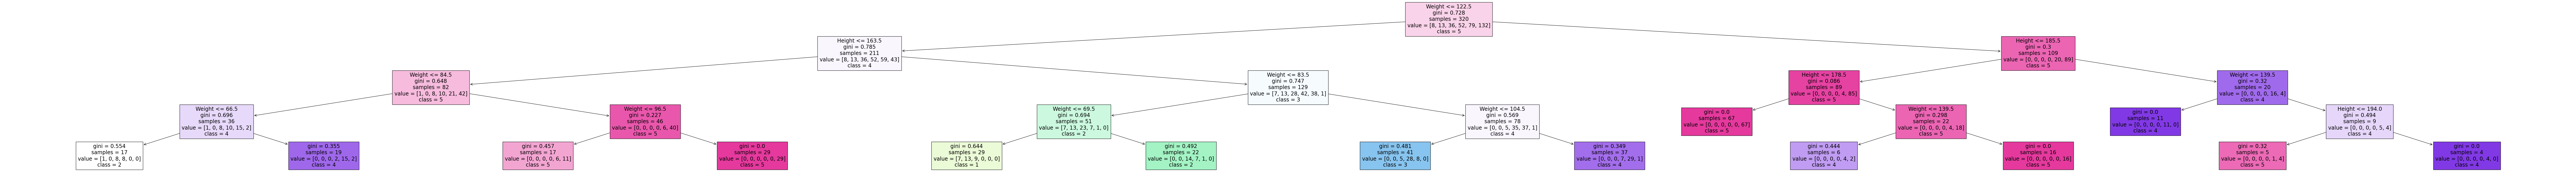

In [31]:
plt.figure(figsize = (150, 10))
plot_tree(model, feature_names = ['Height', 'Weight'],
          class_names = ['0', '1', '2', '3', '4', '5'], filled = True)
plt.show()

In [32]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
decRandTree = clf.predict(x_test)

In [33]:
print(confusion_matrix(y_test, decRandTree))

[[ 3  1  0  0  0  0]
 [ 1  2  2  0  0  0]
 [ 0  0 13  1  1  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  1 19  1]
 [ 0  0  0  0  3 24]]


In [34]:
print(classification_report(y_test, decRandTree))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.67      0.40      0.50         5
           2       0.81      0.87      0.84        15
           3       0.78      0.88      0.82         8
           4       0.83      0.90      0.86        21
           5       0.96      0.89      0.92        27

    accuracy                           0.85        80
   macro avg       0.80      0.78      0.78        80
weighted avg       0.85      0.85      0.85        80



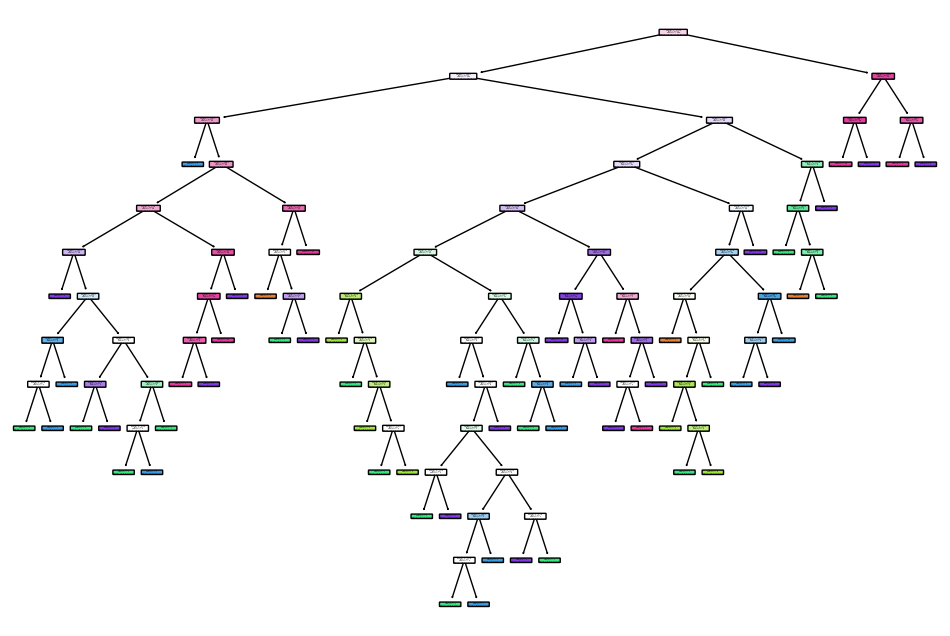

In [35]:
plt.figure(figsize=(12,8))
plot_tree(clf.estimators_[2], filled=True, rounded=True, feature_names=['Height', 'Weight'])
plt.show()

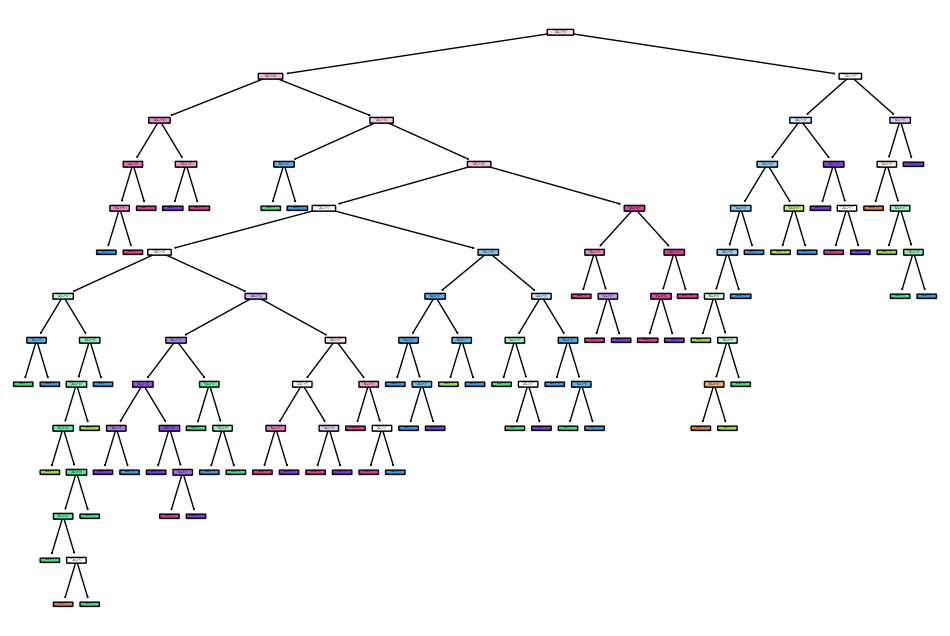

In [36]:
plt.figure(figsize=(12,8))
plot_tree(clf.estimators_[3], filled=True, rounded=True, feature_names=['Height', 'Weight'])
plt.show()

In [37]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 10), n_estimators = 200)
classifier.fit(scaled_x_train, y_train)
predAda = classifier.predict(scaled_x_test)

In [38]:
print(confusion_matrix(y_test, predAda))

[[ 4  0  0  0  0  0]
 [ 1  2  2  0  0  0]
 [ 0  0 10  4  1  0]
 [ 0  0  0  7  1  0]
 [ 0  0  0  2 18  1]
 [ 0  0  0  0  4 23]]


In [39]:
print(classification_report(y_test, predAda))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.40      0.57         5
           2       0.83      0.67      0.74        15
           3       0.54      0.88      0.67         8
           4       0.75      0.86      0.80        21
           5       0.96      0.85      0.90        27

    accuracy                           0.80        80
   macro avg       0.81      0.78      0.76        80
weighted avg       0.83      0.80      0.80        80



In [40]:
print("kNN accuracy:", accuracy_score(y_test,predKnn))
print("SVC accuracy:", accuracy_score(y_test,predSVC))
print("DecisionTree accuracy:", accuracy_score(y_test,predDecTree))
print("RandomForest accuracy:", accuracy_score(y_test,decRandTree))
print("AdaBoost accuracy:", accuracy_score(y_test,predAda))

kNN accuracy: 0.85
SVC accuracy: 0.8875
DecisionTree accuracy: 0.6875
RandomForest accuracy: 0.85
AdaBoost accuracy: 0.8


# New Section

# New Section